In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize

BETA=5

In [2]:
with open('/content/drive/MyDrive/Colab Notebooks/ml_hw5/input.data','r') as fp:
  X=[]
  Y=[]
  all_lines = fp.readlines()
  for line in all_lines:
    line=line.split()
    x=float(line[0])
    y=float(line[1])
    X.append(x)
    Y.append(y)
  X=np.asarray(X).reshape(-1,1)
  Y=np.asarray(Y).reshape(-1,1)

### Rational quadratic kernel
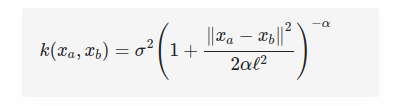

### mean and varience
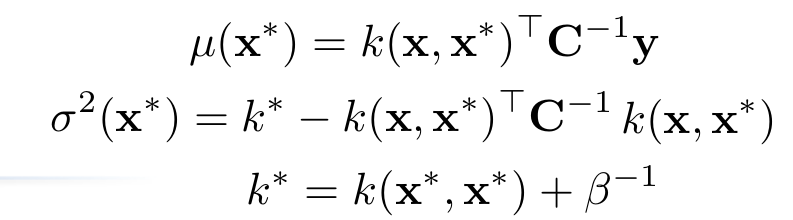


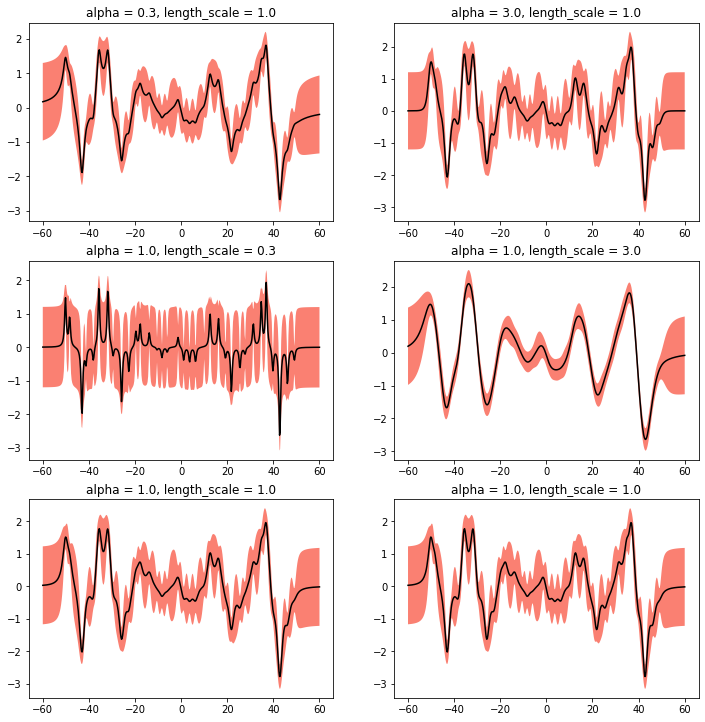

In [38]:
def kernel(Xn,Xm,sigma=1,alpha=1,length_scale=1):
  norm=np.power(Xn.reshape(-1,1)-Xm.reshape(1,-1),2)
  return sigma**2*np.power(1+norm/(2*alpha*length_scale**2),-alpha)

params = [
    (0.3, 1.0),
    (3.0, 1.0),
    (1.0, 0.3),
    (1.0, 3.0),
    (1.0, 1.0),
    (1.0, 1.0),
]
plt.figure(figsize=(12, 5))

for i, (alpha, length_scale) in enumerate(params):
    C=kernel(X,X,alpha=alpha,length_scale=length_scale)+1/BETA*np.identity(len(X))
    x_star=np.linspace(-60,60,num=500).reshape(-1,1)
    k_x_x_star=kernel(X,x_star,alpha=alpha,length_scale=length_scale)
    predict_mean=k_x_x_star.T@np.linalg.inv(C)@Y.reshape(-1,1)
    predict_mean=predict_mean.reshape(-1)
    k_star=kernel(x_star,x_star)+1/BETA
    predict_varience=k_star-k_x_x_star.T@np.linalg.inv(C)@k_x_x_star
    predict_varience=np.diag(predict_varience).reshape(-1)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'alpha = {alpha}, length_scale = {length_scale}')
    plt.plot(x_star,predict_mean,'k')
    plt.fill_between(x_star.reshape(-1),predict_mean+predict_varience,predict_mean-predict_varience,facecolor='salmon')

In [44]:
def marginal_likelihood_function():

  def marginal_likelihood(theta):
    C=kernel(X,X,alpha=theta[0],length_scale=theta[1])+1/BETA*np.identity(len(X))
    p=1/2*np.log(np.linalg.det(C))+1/2*Y.T@np.linalg.inv(C)@Y+len(X)/2*np.log(2*math.pi)
    return p

  return marginal_likelihood

theta=[1,1] #initial guess alpha and length_scale
res = minimize(fun=marginal_likelihood_function(), x0=theta)
optimal_alpha,optimal_length_scale=res.x
print('Optimal alpha: ',optimal_alpha)
print('Optimal length scale: ',optimal_length_scale)

Optimal alpha:  929.4150737883626
Optimal length scale:  2.9669923350392584


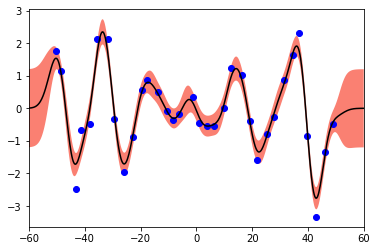

In [45]:
C=kernel(X,X,alpha=optimal_alpha,length_scale=optimal_length_scale)+1/BETA*np.identity(len(X))
k_x_x_star=kernel(X,x_star,alpha=optimal_alpha,length_scale=optimal_length_scale)
predict_mean=k_x_x_star.T@np.linalg.inv(C)@Y.reshape(-1,1)
predict_mean=predict_mean.reshape(-1)
k_star=kernel(x_star,x_star,alpha=optimal_alpha,length_scale=optimal_length_scale)+1/BETA
predict_varience=k_star-k_x_x_star.T@np.linalg.inv(C)@k_x_x_star
predict_varience=np.diag(predict_varience).reshape(-1)

plt.xlim(-60, 60)
plt.plot(X,Y,'bo')
plt.plot(x_star,predict_mean,'k')
plt.fill_between(x_star.reshape(-1),predict_mean+predict_varience,predict_mean-predict_varience,facecolor='salmon')